# Tutorial 4: Supervised Learning Applications (Contd.)

## Objectives

After this tutorial you will be able to:

- Grasp the fundamentals of supervised learning algorithms and their applications in chemical engineering problems.
- Gain hands-on experience building supervised learning models in Python using scikit-learn library.
- Explore metrics for assessing model accuracy, precision, and generalizability for chemical engineering tasks.
- Develop the ability to interpret model predictions and coefficients in the context of chemical engineering principles.
- Discover how supervised learning can be utilized for tasks like property prediction, reaction rate modeling, and process optimization in chemical engineering.


<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#1">Support Vector Machines (SVM)</a>
    </li>
    <br>
    <li>
        <a href="#2">Artificial Neural Networks (ANN)</a>
    </li>
    <br>
    <li>
        <a href="#3">Decision Tree</a>
    </li>
    <br>
    <li>
        <details>
            <summary><a href="#4">Ensemble Learning</a></summary>
            <ul>
                <li><a href="#4_1">Random Forest</a></li>
                <li><a href="#4_2">Bagging</a></li>
                <li><a href="#4_3">Boosting</a></li>
            </ul>
        </details>
    </li>
    <br>
</ol>


<hr id="1">
<h2>1. Support Vector Machines (SVM)</h2>


### **Overview**
- A powerful machine learning algorithm used for classification tasks
- Identifies the hyperplane (decision boundary) in a high-dimensional space that best separates different classes in the data.

- Prioritizes maximizing the margin between the hyperplane and the closest data points from each class (called support vectors). These support vectors define the separation between the classes.

<div style="text-align: center; margin:2rem;">
    <img src="svm.jpg" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

#### **The Kernel Trick**
- SVMs can handle non-linear data by mapping it to a higher-dimensional space using kernel functions. 
- This allows for separation even when classes aren't linearly separable in the original data.

<div style="text-align: center; margin:2rem;">
    <img src="svm_kernel.jpg" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

#### **Support Vector Regression (SVR)**
- An SVM variant for regression tasks (both linear & non-linear).
- SVR aims to fit a regression curve (like a line or a more complex shape) that minimizes the distance to most training data points.
- Imagine a tube around the curve with a pre-defined width (epsilon). Points within the tube are ideal, while those outside are penalized. This balances fitting the data and model generalizability.

- Similar to SVM classification, SVR can use kernel functions to handle non-linear relationships. The "tube" translates into a complex curve in the original data space.

- Data points on the edge of the tube or outside are called support vectors. They define the optimal curve and are most influential on the model.

- SVR might outperform Artificial Neural Networks (ANNs) for regression on smaller to medium-sized datasets with many features (high-dimensional).

<div style="text-align: center; margin:2rem;">
    <img src="svr.jpg" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
- SVMs excel at handling high-dimensional data, making them suitable for complex problems with many features.
- Compared to some algorithms, SVMs can achieve good results even with limited training data.
- SVMs identify a clear margin between classes, which can be helpful for interpreting the model and understanding the separation between categories. This leads to better generalization and reduced overfitting.
- SVMs are less sensitive to outliers in the data compared to some other classification algorithms.
- SVMs can handle non-linear data using kernel functions, making them adaptable to real-world scenarios where data often exhibits complex relationships.
- Can be used for both classification and regression.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- Training SVMs can be computationally expensive, especially for large datasets because the algorithm needs to consider all data points during training.
- While SVMs provide a clear decision boundary, interpreting the internal workings of the model and how original features contribute to the classfication can be more challenging.
- SVM performance with non-linear data depends on the choice of kernel function. Finding the best kernel depends on the specific data and problem and which involves experimentation.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- High-dimensional datasets with complex interactions.
- Dataset is relatively small to moderate in size.
- Robustness to outliers is desired.
- A non-linear decision boundary is required.
- There's a need for a model that generalizes well to unseen data.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example: SVR**

**Problem Overview:**  
The problem at hand involves developing a soft sensor specifically for the debutanizer column within a desulfuring and naphtha splitter plant. The primary objective is to optimize the fractionation process by simultaneously maximizing the content of stabilized gasoline (C5) in the overheads and minimizing the concentration of butane (C4) in the bottoms.

Currently, the measurement of C4 content in the debutanizer bottoms, which serves as the output for the Soft Sensor, is conducted on the overheads of the deisopentanizer column. This measurement point is illustrated in the figure below, with the location of the measuring device indicated by the gray circle named A2. The device gauges the C4 content in the flow to stock, all of which is assumed to originate from the debutanizer bottoms.

The amount of C4 found in iC5 is directly influenced by the debutanizer's operating conditions. Any C4 detected in the iC5 flow is presumed to originate from the debutanizer bottom.

However, due to the analyzer's placement, there is a significant delay in obtaining concentration values. The measuring device operates on a 15-minute cycle, resulting in an estimated delay of about 30 minutes in receiving the data. This means that information about C4 is available with an overall delay of approximately 45 minutes. Given this delay, which is deemed unsuitable for control purposes, the implementation of a soft sensor became necessary.

<div style="text-align: center; margin:2rem;">
    <img src="debutanizer1.png" width="80%">
    <br>
    <small>*source: Fortuna, L., Graziani, S., Rizzo, A., & Xibilia, M. G. (2007). Soft Sensors for Monitoring and Control of Industrial Processes. Springer London.</small>
</div>

**Objectives:**
- Real-time prediction of the butane concentration (C4) in the bottom flow of a debutanizer column, on the basis of a set of available measurements.
- Overcome the delay in obtaining C4 concentration due to the gas chromatograph's location by using soft sensors.
- Ensure that the debutanizer column maintains sufficient fractionation, maximizes C5 content in the overheads (LP gas splitter feed), and minimizes C4 content in the bottoms (Naphtha splitter feed).

**Data:**
- Data is collected from various sensors installed in the plant, including gas chromatographs (A1 and A2), top temperature, pressure, reflux flow, flow to the next process, tray temperatures, and bottom temperatures.
- Data is already cleaned.
- Process parameters:
  - **u1:** Top temperature
  - **u2:** Top pressure
  - **u3:** Reflux flow
  - **u4:** Flow to next process
  - **u5:** 6th tray temperature
  - **u6:** Bottom temperature
  - **u7:** Bottom temperature
  - **y:** C4 concentration

<div style="text-align: center; margin:2rem;">
    <img src="debutanizer2.png" width="80%">
    <br>
    <small>*source: Fortuna, L., Graziani, S., Rizzo, A., & Xibilia, M. G. (2007). Soft Sensors for Monitoring and Control of Industrial Processes. Springer London.</small>
</div>

Import required libraries.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from `debutanizer_data.csv` into a Pandas `DataFrame`

In [2]:
# load the data
data = pd.read_csv('debutanizer_data.csv')
data.head()

,u1,u2,u3,u4,u5,u6,u7,y
0,0.269,0.651,0.833,0.583,0.785,0.843,0.822,0.180
1,0.268,0.650,0.852,0.578,0.776,0.839,0.822,0.177
2,0.268,0.660,0.824,0.572,0.765,0.808,0.786,0.174
3,0.267,0.668,0.808,0.566,0.753,0.800,0.786,0.172
4,0.267,0.647,0.762,0.560,0.745,0.773,0.746,0.167


<Axes: >

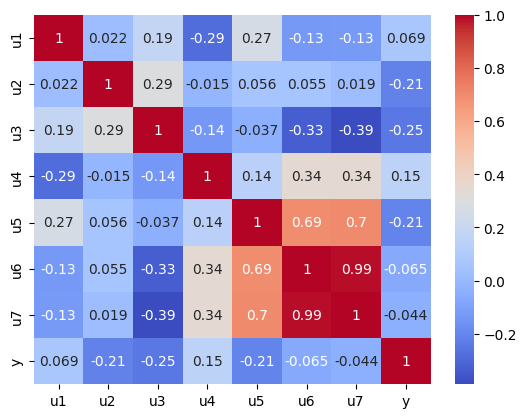

In [3]:
# correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

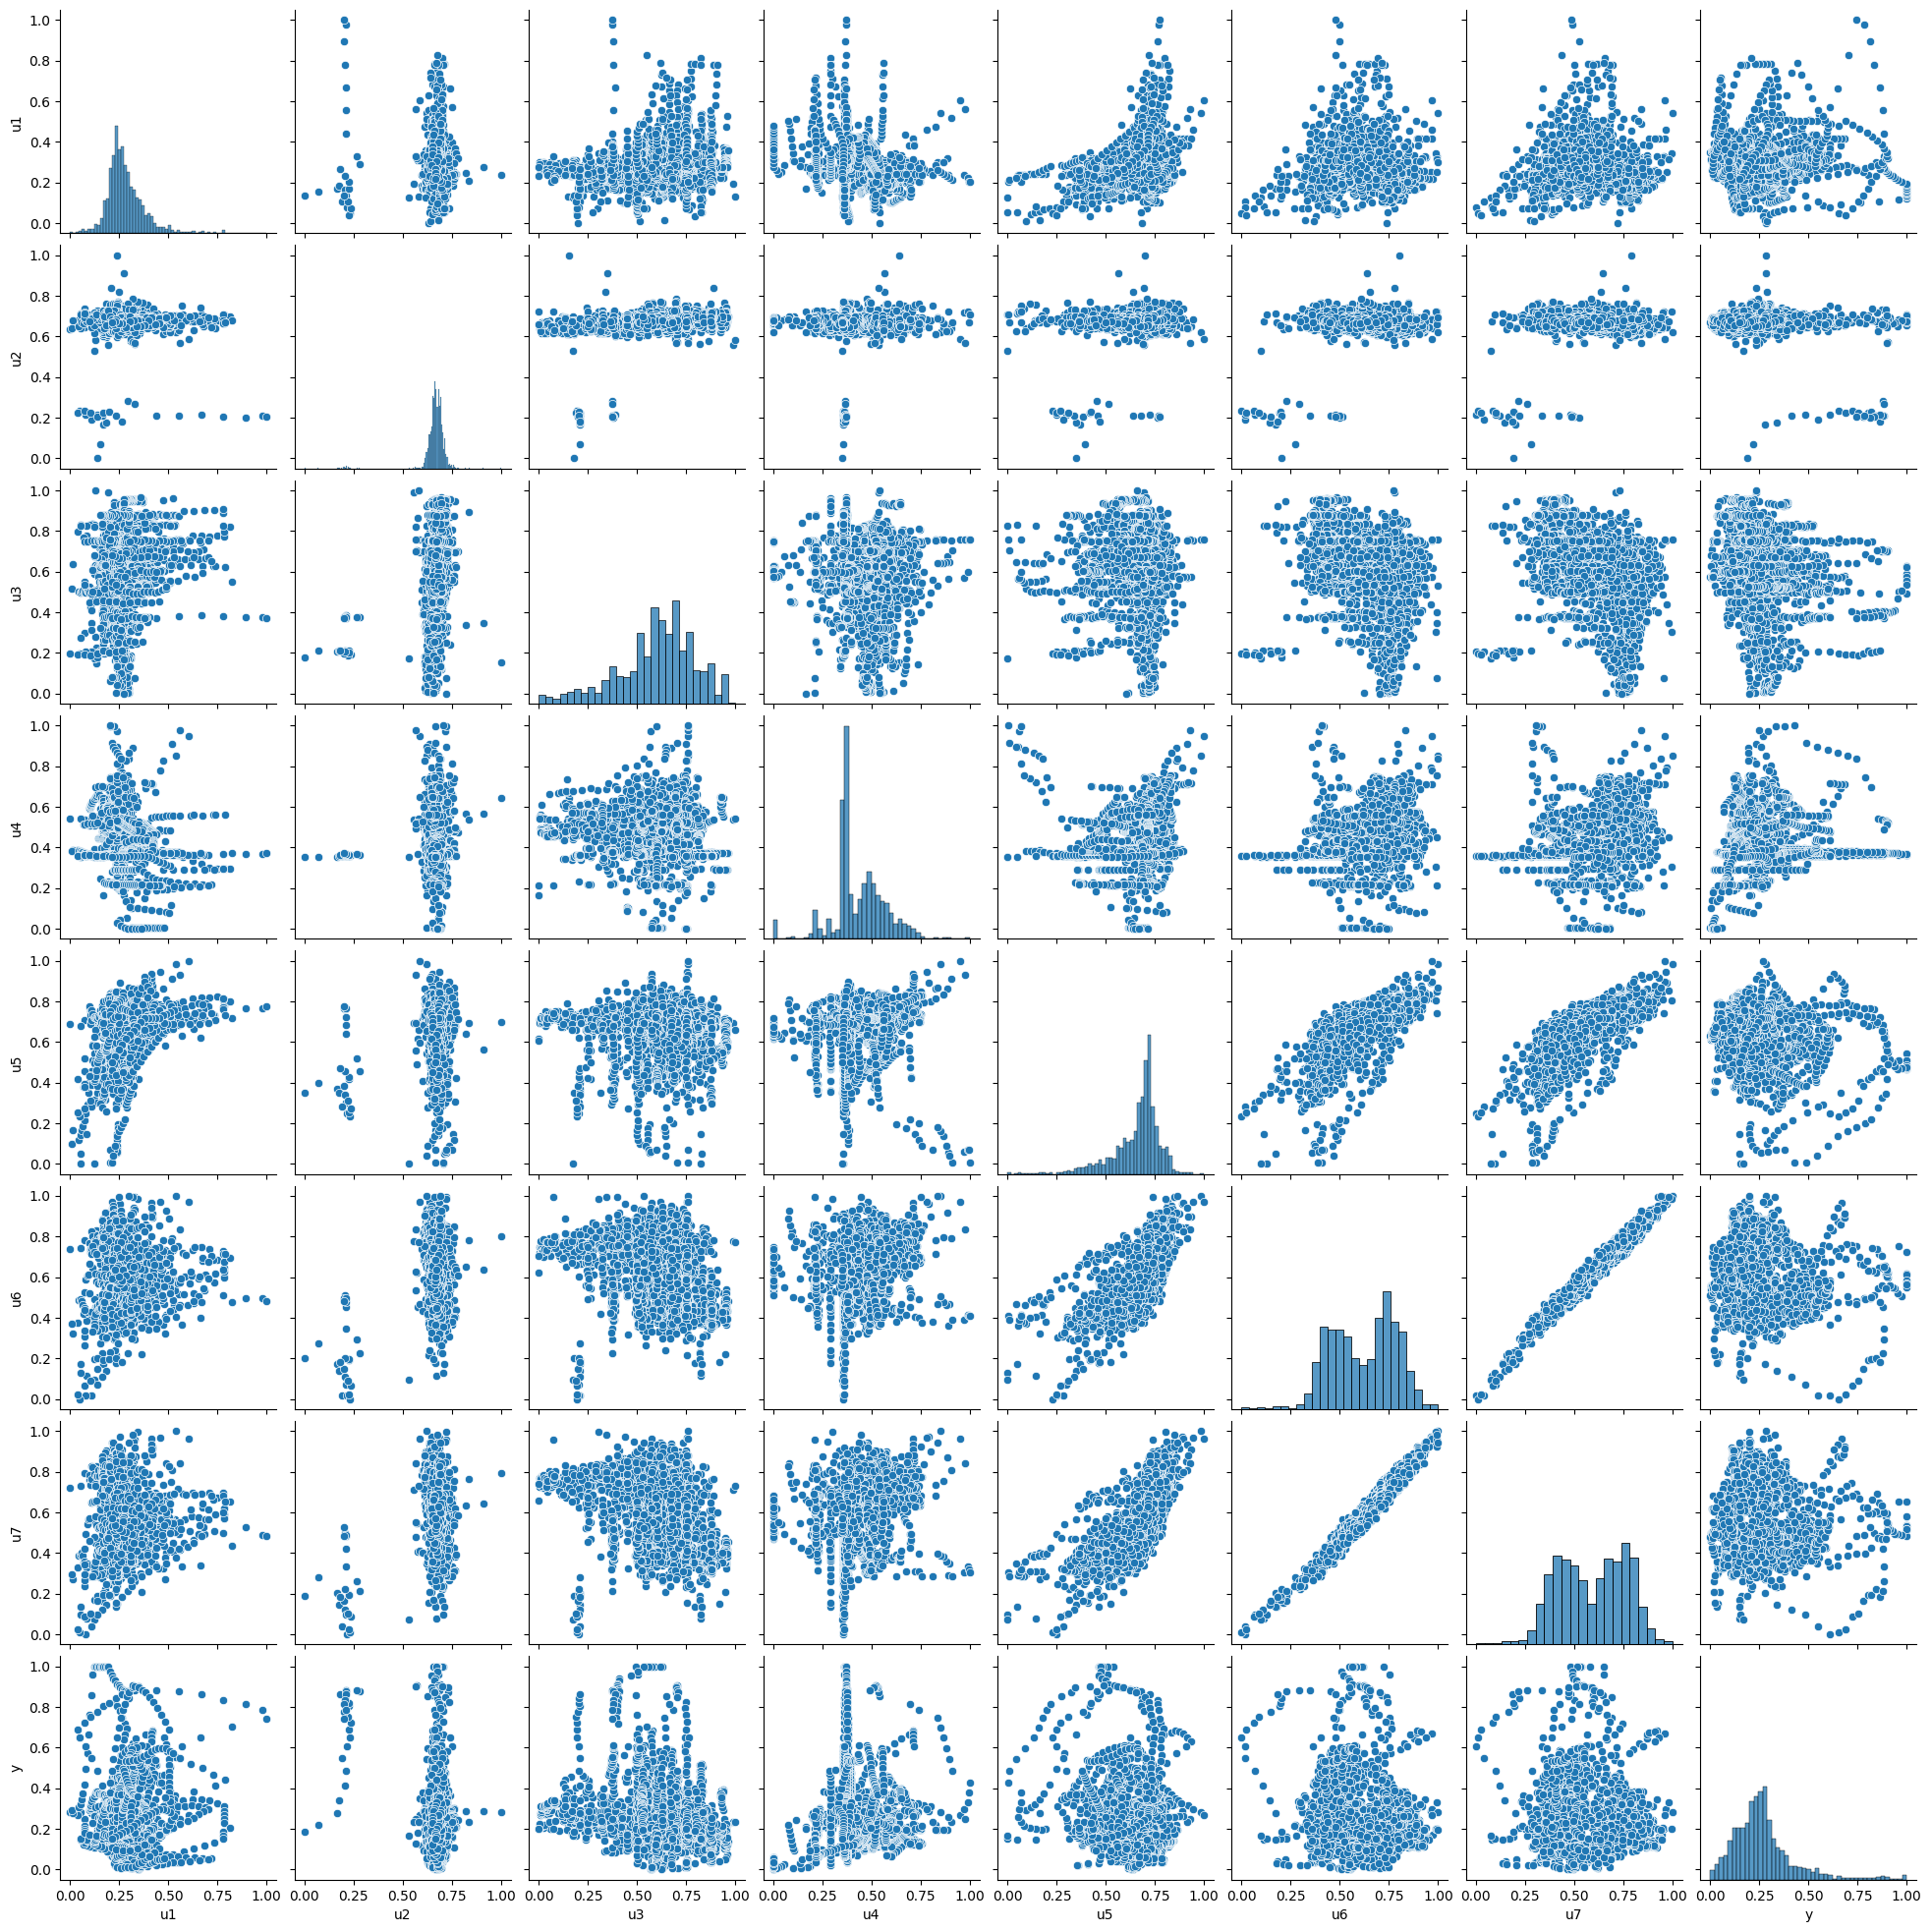

In [4]:
# pairplot
sns.pairplot(data)

Build, train, and evaluate an SVM model.

In [5]:
# 1. import the necessary modules for the selected model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 2. create the model
model = SVR()

# 3. extract X & Y
x = data.drop('y', axis=1)
y = data['y']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
grid_params = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.1, 1, 10, 50, 100]
}
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# 7. make predictions
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

# 8. evaluate the model
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train R2:', r2_score(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test R2:', r2_score(y_test, y_pred_test))

# print the best parameters
print('Best Parameters:', grid_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Train MSE: 0.005022435407831009
Train R2: 0.8073092289349546
Test MSE: 0.006235371771528261
Test R2: 0.7165177971338519
Best Parameters: {'C': 1, 'gamma': 50, 'kernel': 'rbf'}


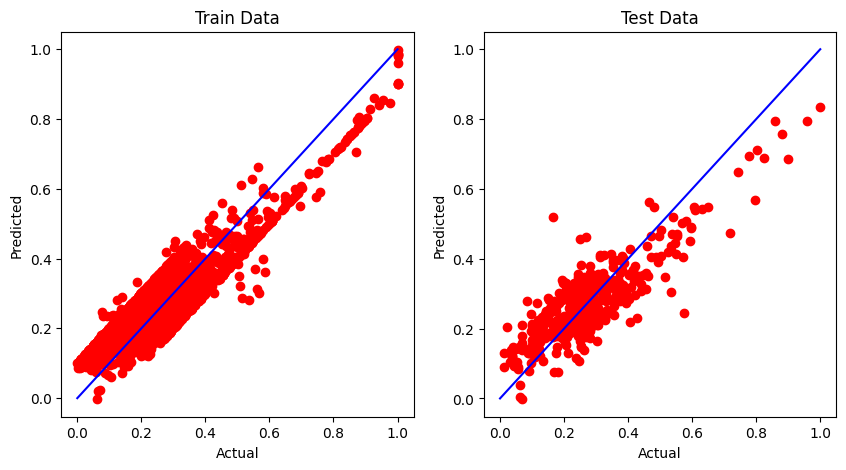

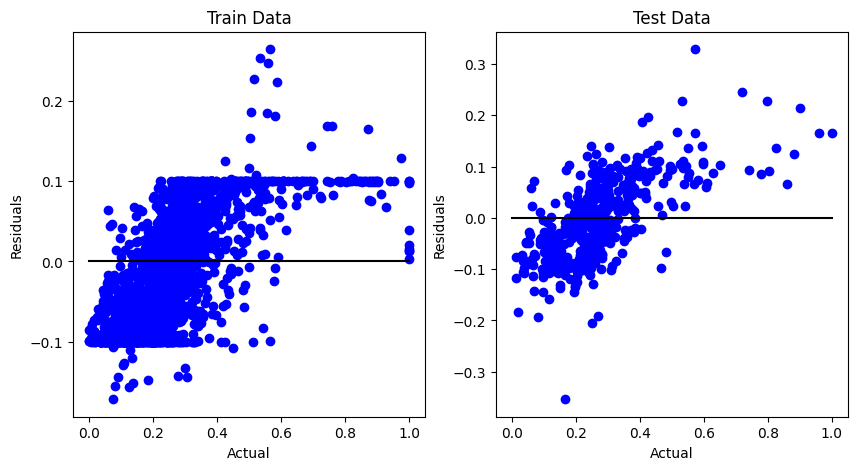

In [6]:
# 9. visualize the results
# 9.1. plot the actual vs predicted values
plt.figure(figsize=(10, 5))
# 45 degree line
x_45 = np.linspace(y.min(), y.max(), 100)
# training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='red')
plt.plot(x_45, x_45, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data')
# testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='red')
plt.plot(x_45, x_45, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.show()

# 9.2. plot the residuals
plt.figure(figsize=(10, 5))
# training
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train - y_pred_train, color='blue')
plt.plot([y.min(), y.max()], [0, 0], color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Train Data')
# testing
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_pred_test, color='blue')
plt.plot([y.min(), y.max()], [0, 0], color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Test Data')
plt.show()

### **Example: SVM**  


**Problem Overview:**  

Sand production is a critical issue during oil and gas well operations, causing equipment damage, production loss, and safety concerns. Predicting sand production allows engineers to implement preventive measures, like sand control strategies, optimizing production efficiency and safety.

**Objectives:**
- Develop a binary classification model that can predict whether sand production will occur in a well based on wellbore and reservoir characteristics.
- Increase well production efficiency by reducing sand production incidents.
- Enhance operational safety by identifying wells at risk of sand production.

**Data:**
- The dataset consists of 29 wells from the Northern Adriatic basin (sources: Moricca et al., 1994; Gharagheizi et al., 2017). Each well is described by the following attributes:
- Features:
    - TVD (True Vertical Depth)
    - BHFP (Bottom-Hole Flowing Pressure)
    - TT (Transmit Time)
    - DD (Drawdown Pressure)
    - COH (Cohesive Strength of Formation)
    - EOVS (Effective Overburden Stress)
    - Qg (Gas Flow Rate)
    - SPF (Shots Per Foot)
    - Qw (Water Flow Rate)
    - Hperf (Perforation Interval)
- Target Variable:
    - Sand Production (1: Sand Production Occurred, 0: No Sand Production)

In [7]:
data = pd.read_csv('sand_production.csv')
data.head()

,No,TVD,TT,COH,Qg,Qw,BHFP,DD,EOVS,SPF,Hperf,Sand Production Observed
0,1,319,105,22.0,42.3,5672.0,133.2,27.8,651,4.0,14.0,1
1,2,3182,105,21.9,51.2,68.0,140.4,16.6,642,4.0,16.0,1
2,3,3366,100,24.7,66.9,157.0,156.2,18.9,601,4.0,6.0,1
3,4,3647,100,29.6,80.6,85.0,153.8,57.8,670,8.0,20.0,1
4,5,4548,85,53.2,48.0,886.0,209.1,58.9,823,4.0,18.0,1


In [8]:
# 1. import the necessary modules for the selected model (svm)
# split the data into k-folds and train the model on k-1 folds and test on the remaining fold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# 2. create the model
model = SVC()

# 3. extract X & Y
x = data.drop(['Sand Production Observed', 'No'], axis=1)
y = data['Sand Production Observed']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 6. fit the model
grid_params = {
    'C': [0.001, 0.01, 1, 10, 100],
    'kernel': ['rbf', 'sigmoid', 'linear']
}
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=4, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# 7. make predictions
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

# 8. evaluate the model
print('Train Classification Report:\n', classification_report(y_train, y_pred_train))
print('Test Classification Report:\n', classification_report(y_test, y_pred_test))
print('Best Parameters:', grid_search.best_params_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

Best Parameters: {'C': 0.01, 'kernel': 'linear'}


<hr id="2">
<h2>2. Artificial Neural Networks (ANN)</h2>


### **Overview**
- Artificial neural networks (ANNs) are empirical models capable of capturing complex relationships between input-output variables.
- They operate through supervised learning for prediction or classification tasks and unsupervised learning for data pattern recognition.
- Inspired by the human brain, ANNs consist of interconnected neurons organized in layers.
- The network structure includes an input layer, multiple hidden layers, and an output layer.
- Neurons in the network compute a weighted sum of inputs, apply a nonlinear transformation, and produce an output.
- Even a single hidden layer in an ANN can approximate any continuous function with desired accuracy, known as the universal approximation property.

<div style="text-align: center; margin:2rem;">
    <img src="ann.png" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
- ANNs excel at modeling intricate, non-linear relationships between input and output variables, making them ideal for tasks with complex patterns.
- They possess adaptability, allowing them to learn and adjust based on data variations, making them suitable for diverse and dynamic datasets.
- ANNs autonomously learn important features from raw data, diminishing the reliance on manual feature engineering.
- Their scalability enables ANNs to handle vast amounts of data and high-dimensional datasets effectively, making them versatile for different applications.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- ANNs are complex models with numerous parameters, which can lead to challenges in interpretation and susceptibility to overfitting, especially with limited training data.
- Training ANNs can be computationally demanding, especially for deep architectures and extensive datasets.
- They generally necessitate large datasets during training to prevent overfitting and achieve satisfactory generalization.
- ANNs are often regarded as black-box models due to their opaque nature, making it difficult to interpret or explain the relationship between input features and predictions.
- They are prone to overfitting, particularly when not properly regularized or when the model complexity exceeds the dataset's capacity.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- For tasks requiring feature learning or representation learning, where ANNs can automatically learn relevant features from raw data, reducing the need for manual feature engineering.
- When dealing with high-dimensional data or datasets with a large number of features, as neural networks can handle such data efficiently, especially deep learning models designed for hierarchical feature extraction.
- In applications where the data distribution may change over time or exhibit non-stationarity, as neural networks can adapt and learn from new data, making them suitable for dynamic environments.
- When there is a need for ensemble learning or model stacking, where neural network models can be combined with other machine learning algorithms to leverage their complementary strengths and improve overall predictive performance.
- In tasks involving time-series data or sequential data, such as process parameters forecasting, natural language processing (NLP), where RNNs and Long Short-Term Memory (LSTM) networks can capture temporal dependencies.
- When working with unstructured data such as images, audio, and text, where neural networks like convolutional neural networks (CNNs) and recurrent neural networks (RNNs) excel due to their ability to extract meaningful features.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example**

**Problem Overview:**


**Objectives:**


**Data:**



In [9]:
data = pd.read_csv('sand_production.csv')
data.head()

# 1. load the necessary modules for the selected models (neural netowrk)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. create the model
ann = MLPClassifier(
    hidden_layer_sizes=(100, 100), 
    activation='logistic', 
    solver='adam', 
    max_iter=100000, 
    random_state=42
)

# 3. extract X & Y
x = data.drop(['Sand Production Observed', 'No'], axis=1)
y = data['Sand Production Observed']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 6. fit the model
ann.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

# 8. evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



In [23]:
# load the data
data = pd.read_csv('debutanizer_data.csv')
data.head()

# 1. import the necessary modules for the selected model (neural network)
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. create the model
ann = MLPRegressor(
    hidden_layer_sizes=(500, 500, 500), 
    activation='relu',
    solver='adam', 
    max_iter=100000,
)

# 3. extract X & Y
x = data.drop('y', axis=1)
y = data['y']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 6. fit the model
ann.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

# 8. evaluate the model
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train R2:', r2_score(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test R2:', r2_score(y_test, y_pred_test))


Train MSE: 0.005020742203330304
Train R2: 0.7991140939962551
Test MSE: 0.006218741024720192
Test R2: 0.7627653015813933


<hr id="3">
<h2>3. Decision Trees</h2>


### **Overview**
- The decision tree algorithm is a popular machine learning algorithm used for both classification and regression tasks.
- It is a tree-like structure where each internal node represents a "decision" based on a feature or attribute.
- The branches represent the outcomes of the decision, leading to further nodes or leaves.
- Leaves represent the final decision or prediction (class label for classification or numerical value for regression).
- Decision trees are built based on training data by recursively splitting the dataset into subsets based on the most significant feature that improves the "purity" or homogeneity of the subsets.
- The splitting process continues until a stopping criterion is met, such as reaching a maximum depth, minimum number of samples per leaf, or no further improvement in purity.
- Decision trees are interpretable and easy to understand, making them suitable for exploratory analysis and decision-making processes.
- They can handle both numerical and categorical data, as well as multi-output tasks.
- Decision trees can suffer from overfitting, especially with complex trees, which may generalize poorly to unseen data. Techniques like pruning and setting constraints help mitigate overfitting.

<div style="text-align: center; margin:2rem;">
    <img src="dt.jpg" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
- Simple to understand and interpret
- Able to handle both numerical and categorical data
- Has built-in feature selection
- Performs well with large number of features
- Directly handles multi-class problems
- Can deal with missing values

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- Decision trees are prone to overfitting, especially with complex trees and small datasets, which can lead to poor generalization on unseen data.
- Sensitive to data changes (tree structure can vary significantly depending on the training data)
- Decision trees are sensitive to noisy data, outliers, and small variations in the training data, which can result in less robust models.
- Decision trees create discontinuous decision boundaries, which may not be suitable for datasets with continuous features. Because of this, Decision Tree regressors often have limited performance compared to other algorithms and are not good at extrapolation.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- **Interpretability**: When interpretability of the model is important, decision trees offer a clear and intuitive representation of the decision-making process.
- **Feature Importance:** Decision trees provide feature importance scores, which can help in feature selection and identifying the most relevant features for prediction.
- **Mixed data types**: Decision trees can handle both numerical and categorical data without requiring extensive preprocessing.
- **Nonlinear Relationships:** Decision trees can capture nonlinear relationships between features and the target variable, making them suitable for datasets with complex relationships.
- **Scalability:** Decision trees can handle large datasets efficiently, especially with modern implementations and optimizations like tree pruning and parallel processing.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example**

**Problem Overview:**


**Objectives:**


**Data:**



In [23]:
data = pd.read_csv('Fracability_DataSet.csv')

# 1. import the necessary modules for the selected model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 2. create the model
model = DecisionTreeClassifier(max_depth=3)

# 3. extract X & Y
x = data.drop('Fracability', axis=1)
y = data['Fracability']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
model.fit(x_train, y_train)

# 7. make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# 8. evaluvate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       402
           1       0.99      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        98
           1       0.90      0.89      0.90       102

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



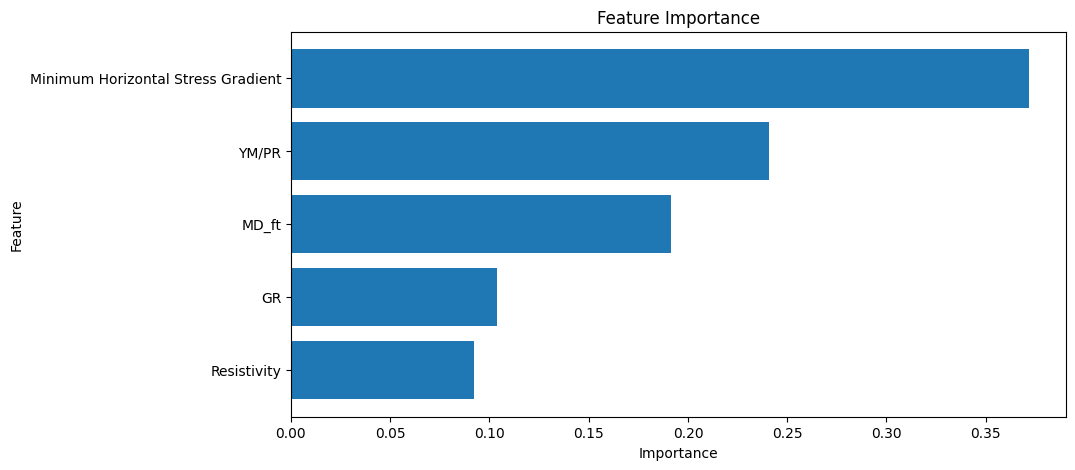

In [44]:
# sort the features based on their importance
features = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
})
features.sort_values(by='Importance', ascending=True, inplace=True)

# plot the feature importances
plt.figure(figsize=(10, 5))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

[Text(0.5, 0.875, 'Minimum Horizontal Stress Gradient <= 0.962\ngini = 0.5\nsamples = 800\nvalue = [402, 398]\nclass = normal'),
 Text(0.25, 0.625, 'YM/PR <= 18.371\ngini = 0.354\nsamples = 430\nvalue = [331, 99]\nclass = normal'),
 Text(0.125, 0.375, 'MD_ft <= 11204.895\ngini = 0.341\nsamples = 87\nvalue = [19, 68]\nclass = challenge'),
 Text(0.0625, 0.125, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = normal'),
 Text(0.1875, 0.125, 'gini = 0.229\nsamples = 76\nvalue = [10, 66]\nclass = challenge'),
 Text(0.375, 0.375, 'MD_ft <= 18525.799\ngini = 0.164\nsamples = 343\nvalue = [312, 31]\nclass = normal'),
 Text(0.3125, 0.125, 'gini = 0.085\nsamples = 314\nvalue = [300, 14]\nclass = normal'),
 Text(0.4375, 0.125, 'gini = 0.485\nsamples = 29\nvalue = [12, 17]\nclass = challenge'),
 Text(0.75, 0.625, 'MD_ft <= 10484.391\ngini = 0.31\nsamples = 370\nvalue = [71, 299]\nclass = challenge'),
 Text(0.625, 0.375, 'GR <= 397.687\ngini = 0.34\nsamples = 46\nvalue = [36, 10]\nclass = normal

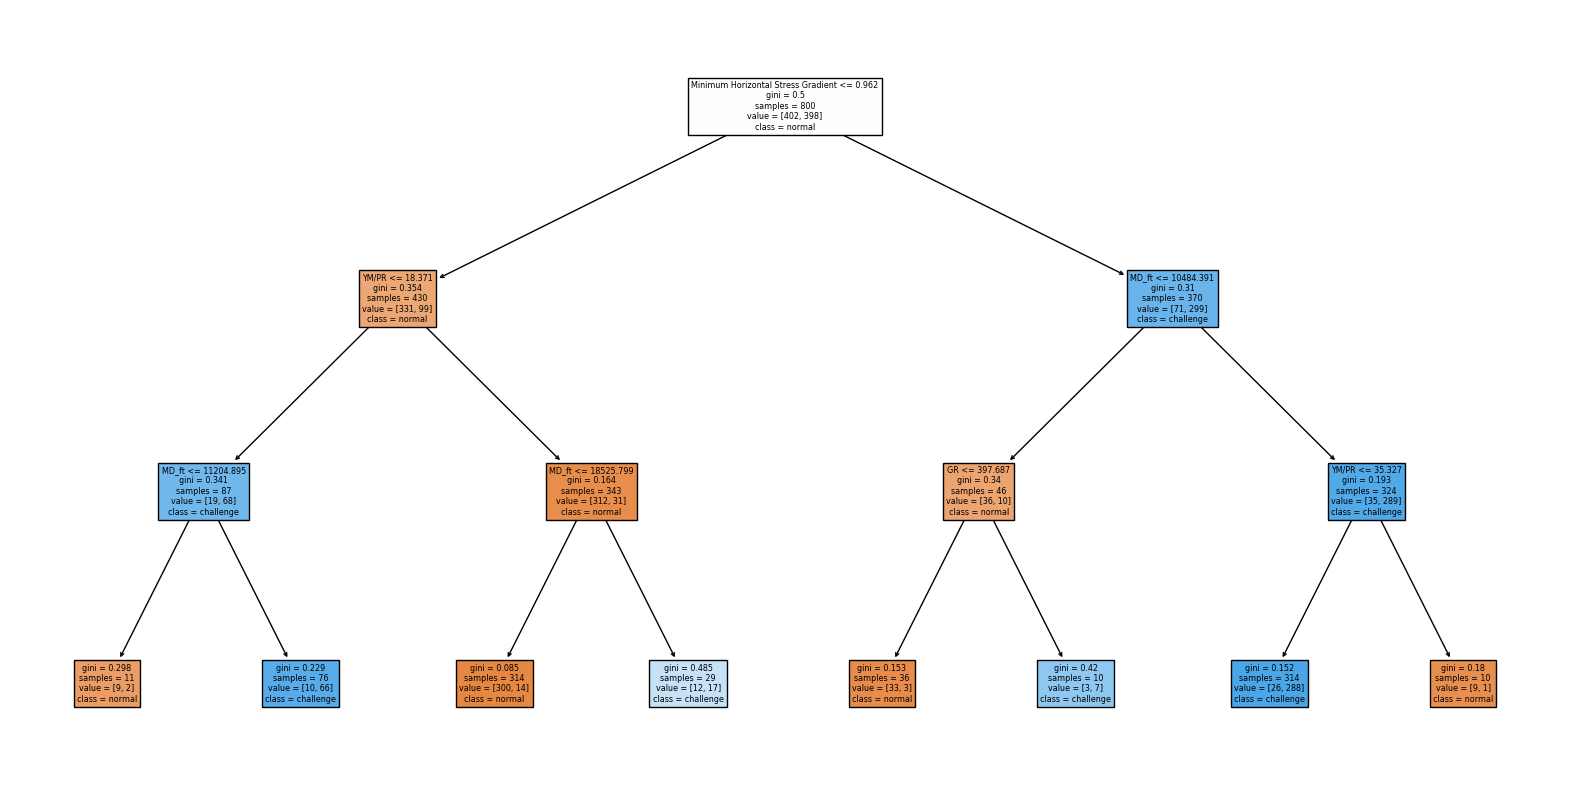

In [50]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['normal', 'challenge'])

<hr id="4">
<h2>4. Ensemble Learning</h2>


### **Overview**
Ensemble learning involves combining multiple weak or mediocre models to create a strong model, a concept not exclusive to random forests but a broader technique in machine learning. Methods like random forests are specific implementations known as ensemble methods. The process employs a diverse set of base models, creating either a heterogeneous ensemble (with different learning methodologies) or a homogeneous ensemble (using the same algorithm).  
  
Aggregating predictions from base models is crucial. For classification, methods like majority voting or soft voting (using class probabilities) are employed. In regression, predictions are typically aggregated using simple or weighted averaging.  
  
In ensemble learning, weak models individually have poor performance due to bias or variance issues. However, combining them can lead to improved accuracy (lower bias) or robustness (lower variance). Not all poor models can be combined effectively; they must meet specific criteria. Base models must perform better than random guessing and exhibit diversity, ensuring uncorrelated errors on unseen data.  
  
### **Types**
1. **Heterogeneous**
   - The base models or learneres are different from each other and can use different learning algorithms.
   - The diversity in base models helps capture different aspects of the data and improve overall prediction accuracy.

<div style="text-align: center; margin:2rem;">
    <img src="ensemble1.jpg" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

2. **Homogeneous**
   - All base models use the same learning algorithm.
   - The only difference among base models might come from using different subsets of the training data, features, or hyperparameters.

<div style="text-align: center; margin:2rem;">
    <img src="ensemble2.jpg" width="80%">
    <br>
    <small>*source: Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering</small>
</div>

#### **Example #1:** Heterogoneous Ensemble Model

In [51]:
# load the data for classification
data = pd.read_csv('Fracability_DataSet.csv')

# 1. load the necessary modules for the selected models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 2. create the models
# create the individual models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier(max_depth=5)
svm = SVC(probability=True)

# create the ensemble model
ensemble = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('dt', dec_tree), 
    ('svm', svm)
], voting='soft')

# 3. extract X & Y
x = data.drop('Fracability', axis=1)
y = data['Fracability']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
ensemble.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)

# 8. evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       402
           1       0.90      0.94      0.92       398

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        98
           1       0.91      0.86      0.88       102

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [26]:
# load the data
data = pd.read_csv('debutanizer_data.csv')
data.head()

# 1. import the necessary modules for the selected model ensemble model with SVR and neural network
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. create the model
ann = MLPRegressor(
    hidden_layer_sizes=(500, 500, 500), 
    activation='relu',
    solver='adam', 
    max_iter=100000,
)
svr = SVR(C=10, gamma=10)
ensemble = VotingRegressor(estimators=[
    ('ann', ann),
    ('svr', svr)
])

# 3. extract X & Y
x = data.drop('y', axis=1)
y = data['y']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 6. fit the model
ensemble.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)

# 8. evaluate the model
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Train R2:', r2_score(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Test R2:', r2_score(y_test, y_pred_test))


Train MSE: 0.005814688301253467
Train R2: 0.7665251256807621
Test MSE: 0.007262363500363849
Test R2: 0.7264059150172186


#### **4.1 Bagging**
Bagging in ensemble learning involves creating multiple bootstrap samples from the training data, training base models on these samples independently, and aggregating their predictions through techniques like majority voting or averaging to improve model stability and reduce variance.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Advantages**
- It reduces the risk of overfitting, especially for complex models that are prone to capturing noise in the training data.
- Bagging often leads to better generalization performance on unseen data compared to individual models or a single model trained on the entire dataset.
- Bagging can increase the model's robustness to outliers and noisy data points since it combines predictions from multiple models.
- Training base models in bagging can be easily parallelized since each model is trained independently on a subset of the data.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Disadvantages**
- The ensemble model produced by bagging is often complex and lacks interpretability compared to individual base models.
- Bagging may not significantly improve the performance of biased models that are already underfitting the data.
- Training multiple models and combining their predictions can require more computational resources compared to training a single model.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Selection Guidelines**
- When the base learning algorithm tends to overfit the training data, resulting in high variance.
- Bagging tends to be more stable and less sensitive to noisy data compared to boosting. It can handle outliers and noisy features better, leading to robust model performance.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Example #2:** Bagging

In [64]:
# load the data for classification
data = pd.read_csv('Fracability_DataSet.csv')

# 1. load the necessary modules for the selected models (bagging classifier)
from sklearn.ensemble import BaggingClassifier

# 2. create the model
ensemble = BaggingClassifier(n_estimators=100, random_state=42)

# 3. extract X & Y
x = data.drop('Fracability', axis=1)
y = data['Fracability']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
ensemble.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)

# 8. evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        98
           1       0.95      0.93      0.94       102

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



#### **4.2 Boosting**
Boosting in ensemble learning combines multiple weak learners sequentially, where each subsequent model corrects errors made by the previous one. It focuses on improving the accuracy of the model by giving more weight to misclassified instances during training iterations.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Advantages**
- Boosting typically achieves higher accuracy compared to individual models by iteratively improving the model's performance.
- Boosting can capture complex relationships in the data by combining weak learners into a strong model.
- Boosting can be effective even with base models that have high bias, as it iteratively refines predictions based on errors.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Disadvantages**
- Boosting can be sensitive to noisy data and outliers, leading to potential overfitting.
- Training multiple models sequentially can be computationally expensive and time-consuming.
- Boosting algorithms often require careful parameter tuning to achieve optimal performance, which can be challenging.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Selection Guidelines**
- When the base model tends to have high bias.
- Boosting can handle imbalanced datasets better than bagging. It focuses more on misclassified instances, which is crucial in scenarios where minority classes are important.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Example #3:** Boosting

In [66]:
# load the data for classification
data = pd.read_csv('Fracability_DataSet.csv')

# 1. load the necessary modules for the selected models (gradient boosting classifier)
from sklearn.ensemble import GradientBoostingClassifier

# 2. create the model
ensemble = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# 3. extract X & Y
x = data.drop('Fracability', axis=1)
y = data['Fracability']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
ensemble.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)

# 8. evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      0.99      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        98
           1       0.93      0.92      0.93       102

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



<hr id="3_3">

#### **4.3 Random Forest**
- A Random Forest combines multiple decision trees to create a more robust and accurate model. 
- It builds multiple decision trees during training and aggregates their predictions through voting (for classification) or averaging (for regression). 
- Each tree in the forest is trained on a random subset of the training data and a random subset of features, which introduces diversity and reduces overfitting. 

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Advantages**
- Random Forests generally have high predictive accuracy for both classification and regression tasks.
- By averaging predictions from multiple trees, Random Forests are less prone to overfitting compared to individual decision trees.
- Random Forests can effectively handle large datasets with high dimensionality and a large number of features.
- They can identify important features in the dataset by assessing their contribution to the model's performance.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Disadvantages**
- Random Forests can be computationally expensive and require more resources compared to simpler models like decision trees.
- While they provide accurate predictions, the ensemble nature of Random Forests makes them less interpretable than individual decision trees.
- Training a Random Forest model can take longer than training a single decision tree, especially for large datasets or a high number of trees in the forest.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Selection Guidelines**
- When dealing with noisy and complex datasets.
- When dealing with imbalanced datasets.
- For large datasets with high dimensionality and a large number of features.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

#### **Example #4:** Random Forest

In [67]:
# load the data for classification
data = pd.read_csv('Fracability_DataSet.csv')

# 1. load the necessary modules for the selected models (random forest)
from sklearn.ensemble import RandomForestClassifier

# 2. create the model
ensemble = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. extract X & Y
x = data.drop('Fracability', axis=1)
y = data['Fracability']

# 4. pre-process the data (if necessary)

# 5. split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. fit the model
ensemble.fit(x_train, y_train)

# 7. make predictions
y_pred_train = ensemble.predict(x_train)
y_pred_test = ensemble.predict(x_test)

# 8. evaluate the model
print('Training Data Classification Report:')
print(classification_report(y_train, y_pred_train))
print('Testing Data Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        98
           1       0.95      0.92      0.94       102

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



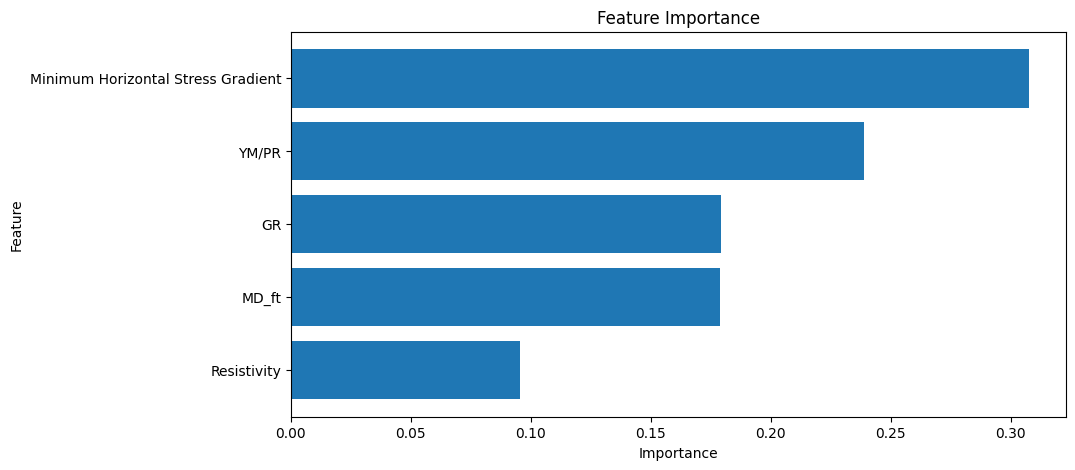

In [68]:
# sort the features based on their importance
features = pd.DataFrame({
    'Feature': x.columns,
    'Importance': ensemble.feature_importances_
})
features.sort_values(by='Importance', ascending=True, inplace=True)

# plot the feature importances
plt.figure(figsize=(10, 5))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>

- Hoss Belyadi, Alireza Haghighat, 2021. Machine Learning Guide for Oil and Gas Using Python
- Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering
- https://github.com/ML-PSE/Machine_Learning_for_PSE